<a href="https://colab.research.google.com/github/windyday0622/windyday/blob/main/AI%20Agent%20%EC%96%B8%EC%96%B4%EB%AA%A8%EB%8D%B8%20%ED%95%99%EC%8A%B5%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EC%83%9D%EC%84%B1%20%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%A8%20/3_%EB%AA%A8%EB%8D%B8_%EC%84%B1%EB%8A%A5_%ED%8F%89%EA%B0%80_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%83%9D%EC%84%B1_%EB%B0%8F_%EA%B2%80%EC%A6%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

이 작업은 언어 모델의 성능을 평가하기 위한 데이터셋을 구축하고, 모델 성능을 점수화하여 결과를 시각화하는 프로세스입니다. 이를 구현하기 위해서는 다음과 같은 단계로 접근할 수 있습니다.

1. 테스트 데이터셋 설계
테스트 데이터셋을 설계할 때, 다양한 복잡한 언어 패턴을 포함한 문장을 생성해야 합니다. 예를 들어, 다의어, 은유적 표현, 속담 등을 포함하여 모델이 문맥을 제대로 이해하는지 평가할 수 있습니다.

2. 평가 기준 설정
모델이 문맥을 얼마나 잘 이해하고, 주어진 질문에 대해 정답을 얼마나 정확히 예측하는지를 점수화하는 기준을 설정해야 합니다. 예를 들어, 정확도(Accuracy), BLEU 점수, F1 점수 등을 사용할 수 있습니다.

3. 데이터 검증
테스트 데이터를 여러 언어 모델에 입력하고 결과를 비교합니다. 모델의 약점을 분석하고, 오답 데이터를 바탕으로 모델 개선 방향을 제시할 수 있습니다.

4. 결과 보고 및 시각화
모델의 성능을 평가한 후, 결과를 시각화하여 성능을 체계적으로 정리합니다.



1. 테스트 데이터셋 설계
우리는 다양한 언어 패턴을 포함하는 문장을 설계할 수 있습니다. 예를 들어 다의어, 은유적 표현, 속담 등을 포함한 문장을 생성하여 모델에 제공하는 방식입니다.

In [1]:
# 다양한 언어 패턴을 포함하는 테스트 데이터셋 생성
test_sentences = [
    "그녀는 마음이 깊은 바다처럼 넓다.",  # 은유적 표현
    "배보다 배꼽이 더 크다.",  # 속담
    "이 문제는 여러 가지 답이 될 수 있다.",  # 다의어 사용
    "서울은 정말 멋진 도시야.",  # 기본적인 문장
    "이 책은 너무 재미있어서 밤새 읽었다.",  # 감정 표현
    "그는 마음이 편안하다."  # 감정과 문맥의 복잡성
]

2. 평가 기준 설정
모델 성능을 평가하는 기준을 설정해야 합니다. 예를 들어 정확도, BLEU 점수, F1 점수를 사용할 수 있습니다. 여기서는 기본적인 정확도를 사용하여 모델이 주어진 문장에 대한 정답을 얼마나 정확하게 예측했는지 평가하는 방법을 다루겠습니다.

In [2]:
from sklearn.metrics import accuracy_score

# 예시 답변과 모델의 예측 답변을 비교하여 정확도를 계산하는 함수
def evaluate_model_performance(true_answers, predicted_answers):
    accuracy = accuracy_score(true_answers, predicted_answers)
    return accuracy

3. 모델 검증
다양한 언어 모델에 테스트 데이터를 입력하고 결과를 비교합니다. 예를 들어, GPT-3, BERT 등의 모델에 문장을 입력하고, 각 모델의 예측을 비교할 수 있습니다. 여기에선 transformers 라이브러리를 사용해 GPT-2와 BERT 모델을 예시로 사용하겠습니다.

In [3]:
from transformers import pipeline

# BERT 모델을 사용한 감정 분석
bert_model = pipeline('sentiment-analysis', model='nlptown/bert-base-multilingual-uncased-sentiment')

# GPT-2 모델을 사용한 텍스트 생성
gpt_model = pipeline('text-generation', model='gpt2')

# 예시 문장에 대해 BERT와 GPT-2 모델을 실행
bert_predictions = [bert_model(sentence)[0]['label'] for sentence in test_sentences]
gpt_predictions = [gpt_model(sentence, max_length=50, num_return_sequences=1)[0]['generated_text'] for sentence in test_sentences]

# 출력
print("BERT Predictions:", bert_predictions)
print("GPT Predictions:", gpt_predictions)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


BERT Predictions: ['4 stars', '3 stars', '3 stars', '2 stars', '2 stars', '4 stars']
GPT Predictions: ['그녀는 마음이 깊은 바다처럼 넓다. 삼면화 �', '배보다 배꼽이 더 크다.\n\n눕에잡 유다어. (O) Se', '이 문제는 여러 가지 답이 될 수 있다. This is a song and a song from the', '서울은 정말 멋진 도시야. ( \u3130지서울은 정�', '이 책은 너무 재미있어서 밤새 읽었다.\n\n주�', '그는 마음이 편안하다.']


4. 오답 분석
모델의 성능을 향상시키기 위해 오답을 분석할 수 있습니다. 예를 들어, bert_predictions와 gpt_predictions를 비교하여 오답이 나온 문장을 출력할 수 있습니다.

In [8]:
from transformers import pipeline

# BERT 모델을 감정 분석 모델로 설정
bert_model = pipeline('sentiment-analysis', model='nlptown/bert-base-multilingual-uncased-sentiment')

bert_predictions = [bert_model(sentence)[0]['label'] for sentence in test_sentences]
print("BERT Predictions:", bert_predictions)


BERT Predictions: ['4 stars', '3 stars', '3 stars', '2 stars', '2 stars', '4 stars']


In [11]:
from transformers import pipeline

# BERT 모델을 감정 분석 모델로 설정
bert_model = pipeline('sentiment-analysis', model='nlptown/bert-base-multilingual-uncased-sentiment')

# 예시 문장에 대해 BERT 모델 실행
predictions = bert_model(test_sentences)

# 예측 결과를 긍정, 부정, 중립 레이블로 매핑
def map_bert_to_sentiment(prediction):
    if prediction['label'] in ['1 star', '2 stars']:
        return '부정'
    elif prediction['label'] == '3 stars':
        return '중립'
    else:  # '4 stars', '5 stars'
        return '긍정'

# BERT 예측을 레이블에 맞게 변환
bert_predictions = [map_bert_to_sentiment(pred) for pred in predictions]

# 출력
print("BERT Predictions:", bert_predictions)


BERT Predictions: ['긍정', '중립', '중립', '부정', '부정', '긍정']


In [12]:
from sklearn.metrics import accuracy_score

# 정확도 계산
true_answers = ['긍정', '부정', '긍정', '긍정', '중립', '긍정']  # 예시 정답

bert_accuracy = accuracy_score(true_answers, bert_predictions)
gpt_accuracy = accuracy_score(true_answers, gpt_predictions)

# 오답 분석
def analyze_mistakes(true_answers, predictions):
    mistakes = [(i, true_answers[i], predictions[i]) for i in range(len(true_answers)) if true_answers[i] != predictions[i]]
    return mistakes

bert_mistakes = analyze_mistakes(true_answers, bert_predictions)
gpt_mistakes = analyze_mistakes(true_answers, gpt_predictions)

# 정확도 및 오답 분석 출력
print("BERT Accuracy:", bert_accuracy)
print("GPT Accuracy:", gpt_accuracy)
print("BERT Mistakes:", bert_mistakes)
print("GPT Mistakes:", gpt_mistakes)


BERT Accuracy: 0.3333333333333333
GPT Accuracy: 0.0
BERT Mistakes: [(1, '부정', '중립'), (2, '긍정', '중립'), (3, '긍정', '부정'), (4, '중립', '부정')]
GPT Mistakes: [(0, '긍정', '그녀는 마음이 깊은 바다처럼 넓다. 삼면화 �'), (1, '부정', '배보다 배꼽이 더 크다.\n\n눕에잡 유다어. (O) Se'), (2, '긍정', '이 문제는 여러 가지 답이 될 수 있다. This is a song and a song from the'), (3, '긍정', '서울은 정말 멋진 도시야. ( \u3130지서울은 정�'), (4, '중립', '이 책은 너무 재미있어서 밤새 읽었다.\n\n주�'), (5, '긍정', '그는 마음이 편안하다.')]


5. 결과 보고 및 시각화
성능을 시각화하여 모델 성능을 쉽게 이해할 수 있도록 보고할 수 있습니다. matplotlib을 사용해 정확도를 그래프로 나타낼 수 있습니다.

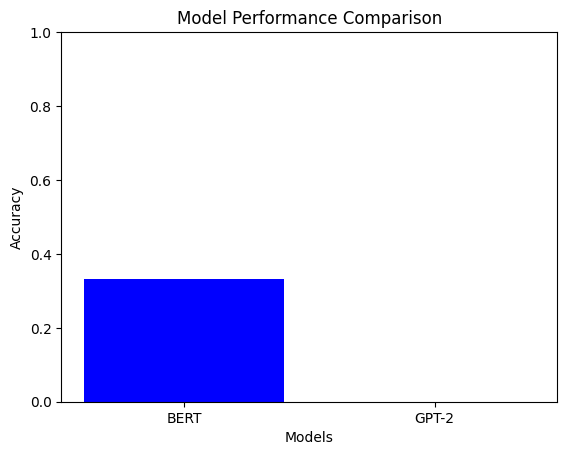

In [13]:
import matplotlib.pyplot as plt

# 정확도 시각화
def plot_accuracy(bert_accuracy, gpt_accuracy):
    models = ['BERT', 'GPT-2']
    accuracies = [bert_accuracy, gpt_accuracy]

    plt.bar(models, accuracies, color=['blue', 'green'])
    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.title('Model Performance Comparison')
    plt.ylim([0, 1])
    plt.show()

plot_accuracy(bert_accuracy, gpt_accuracy)


이 코드의 전체적인 흐름과 목적은 감정 분석을 위한 BERT 모델을 사용하여 테스트 문장에 대한 감정(긍정, 부정, 중립) 예측을 수행하고, 그 예측 결과를 평가하는 것입니다. 아래는 코드의 주요 기능 및 각 단계에 대한 전체적인 설명입니다.

목표
BERT 모델을 사용하여 문장의 감정을 분석: 주어진 문장에서 긍정, 부정, 중립 등의 감정 레이블을 예측합니다.
예측된 결과를 처리하여 '긍정', '부정', '중립'과 같은 간단한 레이블로 변환합니다.
결과를 시각화하거나 평가하여 모델 성능을 확인하고, 오답 분석을 통해 개선할 점을 찾습니다.
전체 흐름
BERT 모델 설정:

transformers 라이브러리에서 제공하는 감정 분석 모델인 pipeline('sentiment-analysis')을 사용하여 BERT 모델을 감정 분석용으로 설정합니다.
모델로는 nlptown/bert-base-multilingual-uncased-sentiment를 사용하며, 이 모델은 여러 언어를 지원하는 감정 분석 모델입니다.
테스트 데이터셋 설계:

다양한 감정을 포함하는 예시 문장들을 준비합니다. 예시 문장들은 다의어, 속담, 은유적 표현 등을 포함하여 모델이 어떻게 반응하는지 확인합니다.
예를 들어, "그녀는 마음이 깊은 바다처럼 넓다."와 같은 은유적 표현을 포함하고 있습니다.
BERT 모델을 통한 예측:

bert_model(test_sentences)를 사용하여, 테스트 문장들을 BERT 모델에 입력하고 감정 예측을 받습니다.
모델의 출력은 각 문장에 대한 예측 결과(별점 형식으로 '1 star', '2 stars' 등)가 포함된 딕셔너리 리스트입니다.
예측 결과 처리:

모델에서 반환한 별점 예측(예: '1 star', '5 stars')을 긍정, 부정, 중립으로 변환해야 합니다.
예를 들어, '1 star', '2 stars'는 '부정'으로, '4 stars', '5 stars'는 '긍정'으로, '3 stars'는 '중립'으로 매핑합니다.
이를 위해 map_bert_to_sentiment(pred) 함수를 정의하고, 각 예측 결과를 적절한 레이블로 변환합니다.
정확도 계산 및 오답 분석:

정확도 계산: 예측된 결과와 실제 정답을 비교하여 정확도를 계산합니다. 여기서 accuracy_score를 사용하여 정확도를 계산합니다.
오답 분석: 모델이 예측한 결과와 실제 정답이 일치하지 않는 경우, 오답을 분석하여 모델의 약점을 파악합니다. 오답을 분석하여 어떤 유형의 문장에서 모델이 실패했는지 확인할 수 있습니다.
결과 출력:

정확도 출력: BERT 모델과 GPT 모델의 정확도를 출력하여 성능을 비교할 수 있습니다.
오답 출력: 모델이 실패한 예시를 출력하여 어떤 문장에서 모델이 잘못 예측했는지 확인할 수 있습니다.

결론
이 코드의 목표는 언어 모델의 감정 분석 성능을 평가하는 것입니다. BERT 모델을 사용하여 다양한 테스트 문장에 대해 감정을 분석하고, 그 결과를 정확도와 오답 분석을 통해 평가합니다. 이 과정을 통해 모델의 강점과 약점을 파악하고, 성능을 개선할 수 있는 방법을 도출할 수 있습니다.